##### Projeto com Feedback - Projeto 3 - Incidentes nos onibus de Londres - Sergio Luis Costa - FCD #### 

OBJETIVO

Responder as seguintes perguntas de negócios.

1.  Qual a quantidade de incidentes por gênero? 

2.  Qual faixa etária esteve mais envolvida nos incidentes? 

3.  Qual o percentual de incidentes por tipo de evento (Incident Event Type)? 

4.  Como foi a evolução de incidentes por mês ao longo do tempo? 2015 a 2018

5.  Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino? 

6.  Qual foi a média de incidentes por mês envolvendo crianças (Child)? 

7.  Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino? 

8.  No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)? 

9.  Considerando o Operador qual a distribuição de incidentes ao longo do tempo? 

10.  Qual o tipo de incidente mais comum com ciclistas? 

In [ ]:
# Instalação dos Pacotes #
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install pyspark
#!pip install pandasql
#!pip install sqlite3

In [1]:
#Ativação dos Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark as pys
import pandasql as ps
import sqlite3
import matplotlib.dates as mdates

In [2]:
# Importação da base de dados
df = pd.read_excel("dados/TFL Bus Safety.xlsx")

In [3]:
df.head(2)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

In [5]:
df.describe()

,Year
count,23158.000000
mean,2016.449607
std,1.074073
min,2015.000000
25%,2016.000000
50%,2016.000000
75%,2017.000000
max,2018.000000


In [6]:
df.describe(include=['object'])

,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
count,23158,23158,23158,23158,23158,23158,23158,23158,23158,23158
unique,612,25,14,84,35,4,10,17,3,5
top,OOS,Metroline,Arriva London,Garage Not Available,Westminster,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
freq,321,3457,4945,8572,1571,17336,6981,18828,11847,10754


In [7]:
# Obtém o nome de todas as colunas do DataFrame
columns = df.columns

# Loop através de todas as colunas do DataFrame
for column in columns:
    # Obtém a contagem de valores únicos na coluna
    counts = df[column].value_counts()
    
    # Exibe o nome da coluna
    print(f"Coluna: {column}")
    
    # Exibe a contagem de valores únicos na coluna
    print(counts)
    print()

Coluna: Year
2017    6573
2016    6093
2015    5715
2018    4777
Name: Year, dtype: int64

Coluna: Date Of Incident
2017-07-01    650
2017-10-01    621
2016-11-01    612
2018-05-01    589
2017-11-01    584
2016-09-01    582
2017-03-01    579
2015-06-01    564
2017-04-01    563
2017-08-01    563
2015-07-01    558
2018-06-01    557
2018-07-01    553
2016-10-01    551
2017-09-01    549
2018-01-01    547
2018-03-01    535
2015-12-01    523
2017-06-01    516
2017-12-01    516
2016-08-01    513
2017-05-01    510
2018-04-01    507
2018-02-01    507
2016-07-01    507
2016-04-01    504
2015-11-01    495
2016-05-01    494
2018-08-01    491
2018-09-01    491
2017-02-01    487
2015-09-01    487
2016-02-01    484
2015-05-01    472
2016-12-01    471
2015-04-01    470
2015-10-01    470
2016-01-01    466
2016-06-01    460
2015-03-01    460
2016-03-01    449
2015-08-01    446
2017-01-01    435
2015-01-01    399
2015-02-01    371
Name: Date Of Incident, dtype: int64

Coluna: Route
OOS    321
18     191


### Manuseando variável - Victims Sex - Preenchendo valores "Unknown" ###

In [9]:
# Obtém a contagem de valores na coluna "Victims Sex"
count_victims_sex = df['Victims Sex'].value_counts()

print(count_victims_sex)

Female     11847
Male        7709
Unknown     3602
Name: Victims Sex, dtype: int64


In [10]:
# VICTIMS SEX - SUBSTITUIR "Unknown" COM BASE NAS PORCENTAGENS EXISTENTES #

# Obtém a contagem de valores na coluna "Victims Sex"
counts = df['Victims Sex'].value_counts()

# Calcula a porcentagem de "Male" e "Female"
male_pct = counts['Male'] / counts.sum()
female_pct = counts['Female'] / counts.sum()

# Substitui "Unknown" com base nas porcentagens
df.loc[df['Victims Sex'] == 'Unknown', 'Victims Sex'] = \
    pd.Series(['Male', 'Female'], index=[0, 1], 
              name='Victims Sex').sample(len(df[df['Victims Sex'] == 'Unknown']), 
                                          replace=True, weights=[male_pct, female_pct]).values

# Verifica se a substituição foi bem-sucedida
print(df['Victims Sex'].value_counts())

Female    14025
Male       9133
Name: Victims Sex, dtype: int64


In [11]:
# Resposta 1. Gráfico - Quantidade de incidentes por gênero - de 2015 a 2018 #

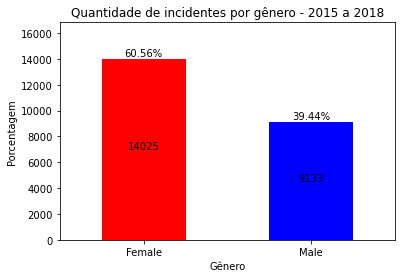

In [12]:
# Utiliza o pandasql para agrupar os dados por gênero e contar o número de incidentes
query = """
    SELECT [Victims Sex], COUNT(*) as incidents
    FROM df
    GROUP BY [Victims Sex]
"""
gender_counts = ps.sqldf(query)

# Calcula a porcentagem de cada valor em relação ao total
total_incidents = gender_counts['incidents'].sum()
gender_counts['percentages'] = (gender_counts['incidents'] / total_incidents) * 100

# Cria o gráfico de barras
ax = gender_counts.plot(kind='bar', x='Victims Sex', y='incidents', color=['red', 'blue'])

# Configura o título e os rótulos dos eixos
plt.title('Quantidade de incidentes por gênero - 2015 a 2018')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')

# Define o limite superior do eixo y
ax.set_ylim(0, gender_counts['incidents'].max() * 1.2)

# Adiciona as porcentagens acima de cada barra
for i, row in gender_counts.iterrows():
    ax.text(i, row['incidents'] + 50, str(round(row['percentages'], 2)) + '%', ha='center', va='bottom')

    # Adiciona o valor total da barra no meio da mesma
    bar = ax.patches[i]
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    ax.text(bar_x, bar_y / 2, row['incidents'], ha='center')

# Ajusta a legenda do eixo x
plt.xticks(rotation=0)

ax.legend().remove()

# Mostra o gráfico
plt.show()

### Manuseando variável - Victims Age - Preenchendo valores "Unknown"  ###

In [13]:
# Obtém a contagem de valores na coluna "Victims Age"
count_victims_age = df['Victims Age'].value_counts()

print(count_victims_age)

Adult      10754
Unknown     7135
Elderly     2769
Child       2181
Youth        319
Name: Victims Age, dtype: int64


In [14]:
# VICTIMS AGE - SUBSTITUIR "Unknown" COM BASE NAS PORCENTAGENS EXISTENTES #

# Obtém a contagem de valores na coluna "Victims Age"
counts = df['Victims Age'].value_counts()

# Calcula a porcentagem de "Adult", "Elderly", "Child" e "Youth"
adult_pct = counts['Adult'] / counts.sum()
elderly_pct = counts['Elderly'] / counts.sum()
child_pct = counts['Child'] / counts.sum()
youth_pct = counts['Youth'] / counts.sum()

# Substitui "Unknown" com base nas porcentagens
df.loc[df['Victims Age'] == 'Unknown', 'Victims Age'] = \
    pd.Series(['Adult', 'Elderly', 'Child', 'Youth'], index=[0, 1, 2, 3], 
              name='Victims Age').sample(len(df[df['Victims Age'] == 'Unknown']), 
                                          replace=True, weights=[adult_pct, elderly_pct, child_pct, youth_pct]).values

# Verifica se a substituição foi bem-sucedida
print(df['Victims Age'].value_counts())

Adult      15562
Elderly     4038
Child       3105
Youth        453
Name: Victims Age, dtype: int64


In [15]:
# Resposta 2.A. GRÁFICO - FAIXA ETÁRIA DOS INCIDENTES - 2015 a 2018 #

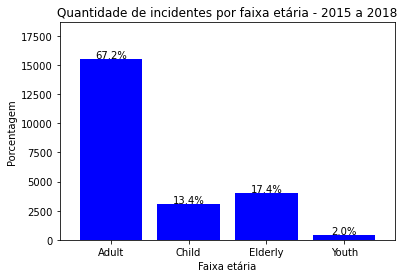

In [16]:
# Agrupa os dados por faixa etária e conta o número de incidentes
query = """
    SELECT [Victims Age], COUNT(*) as incidents
    FROM df
    GROUP BY [Victims Age]
"""
age_counts = ps.sqldf(query)

# Calcula a porcentagem de cada faixa etária
age_counts['percentages'] = (age_counts['incidents'] / age_counts['incidents'].sum()) * 100

# Cria o gráfico de barras
ax = age_counts.plot(kind='bar', x='Victims Age', y='incidents', color='blue', width=0.8, legend=None)

# Configura o título e os rótulos dos eixos
plt.title('Quantidade de incidentes por faixa etária - 2015 a 2018')
plt.xlabel('Faixa etária')
plt.ylabel('Porcentagem')

# Adiciona a porcentagem acima de cada barra
for i, row in age_counts.iterrows():
    ax.text(i, row['incidents'] + 50, str(round(row['percentages'], 1)) + '%', ha='center')

# Define o limite superior do eixo y
ax.set_ylim(0, age_counts['incidents'].max() * 1.2)

# Ajusta a legenda do eixo x
plt.xticks(rotation=0)

# Mostra o gráfico
plt.show()

In [17]:
#Resposta 3.A - Gráfico - Percentual de incidentes por tipo de evento - de 2015 a 2018. #

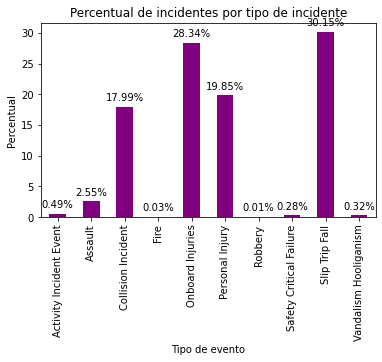

In [18]:
# Agrupando dados Incident Eventy Type.
query = '''
SELECT `Incident Event Type`, COUNT(*) as Total
FROM df
GROUP BY `Incident Event Type`
'''

# Calculando o percentual de cada tipo de evento em relação ao total:
result = ps.sqldf(query, locals())

# Calcular o percentual de cada tipo de evento em relação ao total:
result['Percent'] = (result['Total'] / result['Total'].sum()) * 100

# Define a figura e os eixos
fig, ax = plt.subplots()

# Plotar o gráfico de barras com os percentuais:
result.plot(x='Incident Event Type', y='Percent', kind='bar', legend=False, color='purple', ax=ax)

plt.title('Percentual de incidentes por tipo de incidente')
plt.xlabel('Tipo de evento')
plt.ylabel('Percentual')

# Ajusta a legenda do eixo x
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.05)
fig.subplots_adjust(top=0.80)

for i, v in enumerate(result['Percent']):
    ax.text(i, v + 1, str(round(v, 2)) + '%', ha='center')

plt.show()

In [19]:
# Resposta 4 - Gráfico - Evolução de incidentes por mês ao longo do tempo? 2015 a 2018

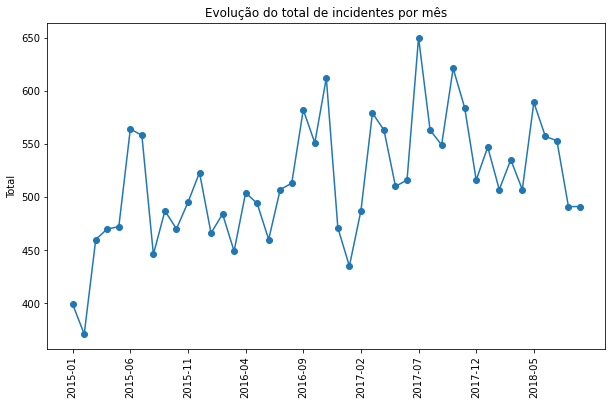

In [20]:
# Conversão da coluna 'Date Of Incident' para datetime
df['Date Of Incident'] = pd.to_datetime(df['Date Of Incident'])

# Criar uma nova coluna com o ano e mês do incidente
df['Month'] = df['Date Of Incident'].apply(lambda x: x.strftime('%Y-%m'))

# Agrupar os dados por mês e tipo de evento
query = '''
SELECT `Month`, `Incident Event Type`, COUNT(*) as Total
FROM df
GROUP BY `Month`, `Incident Event Type`
'''

# Executa a query e armazena o resultado em um DataFrame
result = ps.sqldf(query, locals())

# Agrupar os dados apenas por mês para obter o total de incidentes
total_by_month = result.groupby('Month')['Total'].sum()

# Plotagem do gráfico de linha com a evolução do total de incidentes por mês
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(total_by_month.index, total_by_month.values, marker='o')
ax.set_title('Evolução do total de incidentes por mês')
#ax.set_xlabel('Mês')
ax.set_ylabel('Total')
ax.set_xticks(total_by_month.index[::5])
ax.tick_params(axis='x', rotation=90)

plt.show()

In [21]:
# Resposta 5 - Gráfico - Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino? 
# - 2015 a 2018 #

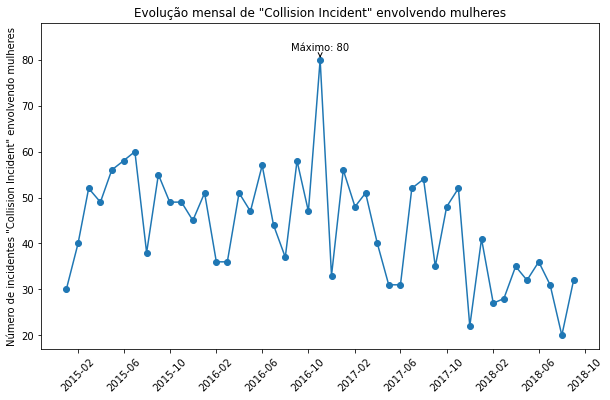

In [23]:
# Selecionar os dados de Collision Incident envolvendo mulheres
query = """
    SELECT *
    FROM df
    WHERE `Incident Event Type` = 'Collision Incident'
        AND `Victims Sex` = 'Female'
"""
collision_female = ps.sqldf(query)

# Converter a coluna Date Of Incident para o tipo datetime
collision_female['Date Of Incident'] = pd.to_datetime(collision_female['Date Of Incident'])

# Agrupar os dados por data e contar o número de incidentes
collision_female_counts = collision_female.groupby(collision_female['Date Of Incident'].dt.to_period('M')).size()

# Plotar o gráfico de linha com a evolução do número de incidentes
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(collision_female_counts.index.to_timestamp(), collision_female_counts.values, marker='o')

# Adicionar marcador no valor mais alto do gráfico
max_value = collision_female_counts.max()
max_index = collision_female_counts.idxmax()
ax.annotate(f'Máximo: {max_value}', xy=(max_index.to_timestamp(), max_value), xytext=(max_index.to_timestamp(), max_value+2),
            arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

# Ajustar a borda superior do gráfico
max_value = collision_female_counts.max()
ax.set_ylim(top=max_value*1.10)

# Plotagem do gráfico de linha com a evolução do total de incidentes por mês envolvendo mulheres
ax.set_title('Evolução mensal de "Collision Incident" envolvendo mulheres')
ax.set_ylabel('Número de incidentes "Collision Incident" envolvendo mulheres')
ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4)) # mostra datas de 5 em 5 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

In [ ]:
#6.  Qual foi a média de incidentes por mês envolvendo crianças (Child)? 

In [29]:
# Query para calcular a média de incidentes por mês envolvendo crianças
query = '''
SELECT round(AVG(`Total`), 2) as media_incidentes
FROM (
    SELECT COUNT(*) as Total
    FROM df
    WHERE `Victims Age` = 'Child'
    GROUP BY strftime('%Y-%m', `Date Of Incident`)
)
'''

# Execução da query e armazenamento do resultado em um DataFrame
result = ps.sqldf(query, locals())

# Imprimir o resultado
print('A média de incidentes por mês envolvendo crianças é de:', result['media_incidentes'][0])


A média de incidentes por mês envolvendo crianças é de: 69.0


In [ ]:
# Resposta 7. Gráfico - Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino? 

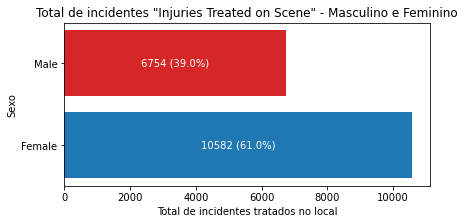

In [28]:
# Query para contar o total de incidentes de pessoas do sexo masculino e feminino
query = '''
SELECT `Victims Sex`, COUNT(*) as "Total Injuries Treated On Scene"
FROM df
WHERE `Injury Result Description` = 'Injuries treated on scene'
GROUP BY `Victims Sex`
'''

# Execução da query e armazenamento do resultado em um DataFrame
result = ps.sqldf(query, locals())

# Cálculo das porcentagens de cada sexo em relação ao total
total_incidentes = result['Total Injuries Treated On Scene'].sum()
result['Porcentagem'] = result['Total Injuries Treated On Scene'] / total_incidentes * 100

# Plotagem do gráfico de barras horizontal com o total de incidentes por sexo
fig, ax = plt.subplots(figsize=(7, 3))
ax.barh(result['Victims Sex'], result['Total Injuries Treated On Scene'], color=['#1f77b4', '#d62728'])
ax.set_title('Total de incidentes "Injuries Treated on Scene" - Masculino e Feminino')
ax.set_xlabel('Total de incidentes tratados no local')
ax.set_ylabel('Sexo')

# Adição das porcentagens no centro das barras
for i, (v, p) in enumerate(zip(result['Total Injuries Treated On Scene'], result['Porcentagem'])):
    ax.text(v/2, i, f'{v} ({p:.1f}%)', color='white', ha='center', va='center')

# Ajuste da margem do gráfico para a direita para evitar que as porcentagens fiquem sobre a linha da margem
plt.subplots_adjust(right=0.85)

# Exibição do gráfico
plt.show()

In [ ]:
# Resposta 8. Gráfico - No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)? 


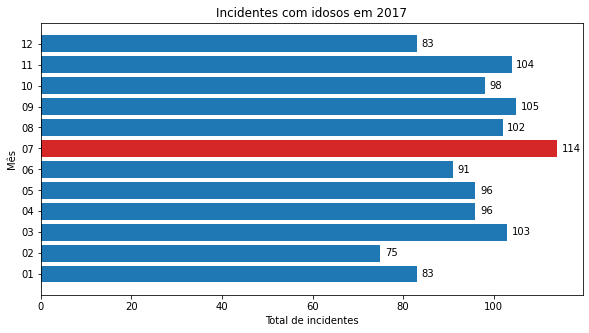

In [77]:
# Filtrando os incidentes com idosos em 2017
query = '''
SELECT *
FROM df
WHERE `Victims Age` = 'Elderly' AND `Date of Incident` >= '2017-01-01' AND `Date of Incident` <= '2017-12-31'
'''
idosos_2017 = ps.sqldf(query, locals())

# Contando o número de incidentes por mês
query = '''
SELECT strftime('%m', `Date of Incident`) as mes, COUNT(*) as total_incidentes
FROM idosos_2017
GROUP BY mes
'''
incidentes_por_mes = ps.sqldf(query, locals())

# Obtendo o mês com mais incidentes
mes_mais_incidentes = incidentes_por_mes.loc[incidentes_por_mes['total_incidentes'].idxmax()]['mes']

# Plotando o gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(7, 5))
ax.barh(incidentes_por_mes['mes'], incidentes_por_mes['total_incidentes'], color='#1f77b4')
ax.set_title('Incidentes com idosos em 2017')
ax.set_xlabel('Quantidade de incidentes')
ax.set_ylabel('Mês')

# Destacando o mês com mais incidentes
ax.barh(mes_mais_incidentes, incidentes_por_mes.loc[incidentes_por_mes['mes'] == mes_mais_incidentes]['total_incidentes'].item(),
        color='#d62728')

# Adicionando os valores no final das barras
for i, v in enumerate(incidentes_por_mes['total_incidentes']):
    ax.text(v + 1, i, str(v), color='black', ha='left', va='center')

# Ajustando a margem do gráfico
plt.subplots_adjust(right=1.2)

# Exibindo o gráfico
plt.show()


In [ ]:
Resposta 9. Gráfico - Considerando o Operador qual a distribuição de incidentes ao longo do tempo? 

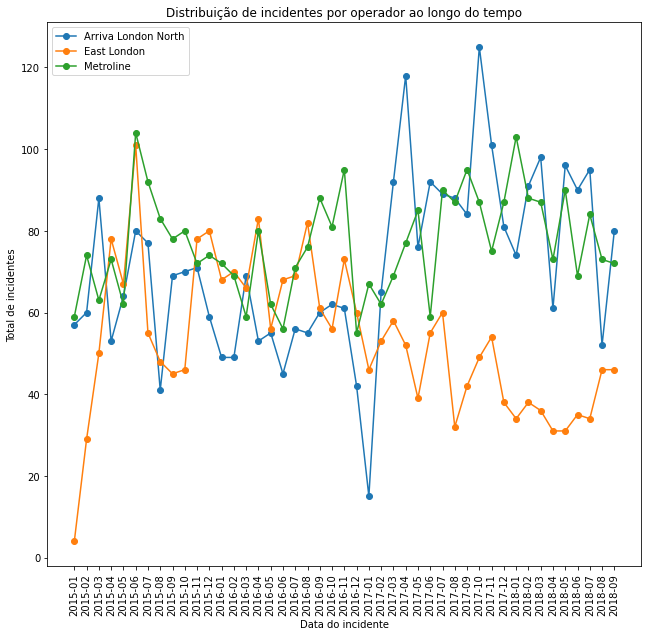

In [109]:
# Consulta SQL para obter a distribuição de incidentes por operador e tipo de evento ao longo do tempo
query = '''
SELECT `Date Of Incident`, `Operator`, COUNT(*) as total_incidentes
FROM df
WHERE `Operator` IN (
    SELECT `Operator`
    FROM df
    GROUP BY `Operator`
    ORDER BY COUNT(*) DESC
    LIMIT 3
)
GROUP BY `Date Of Incident`, `Operator`
'''

# Executando a consulta SQL com pandasql
result = ps.sqldf(query, locals())

# Convertendo a coluna 'Date Of Incident' para o formato de string AAAA-MM
result['Date Of Incident'] = pd.to_datetime(result['Date Of Incident']).dt.strftime('%Y-%m')

# Plotando o gráfico de linhas com marcadores circulares
fig, ax = plt.subplots(figsize=(10, 10))
for operador, grupo in result.groupby('Operator'):
    ax.plot(grupo['Date Of Incident'], grupo['total_incidentes'], label=operador, marker='o')
ax.set_title('Distribuição de incidentes por operador ao longo do tempo')
ax.set_xlabel('Data do incidente')
ax.set_ylabel('Total de incidentes')
ax.legend(loc='upper left')

# Ajustando a margem do gráfico
plt.subplots_adjust(right=0.95)

# Ajustando orientação do texto no eixo x
ax.tick_params(axis='x', rotation=90)

# Exibindo o gráfico
plt.show()

In [ ]:
# Resposta 10. Gráfico - Qual o tipo de incidente mais comum com ciclistas?

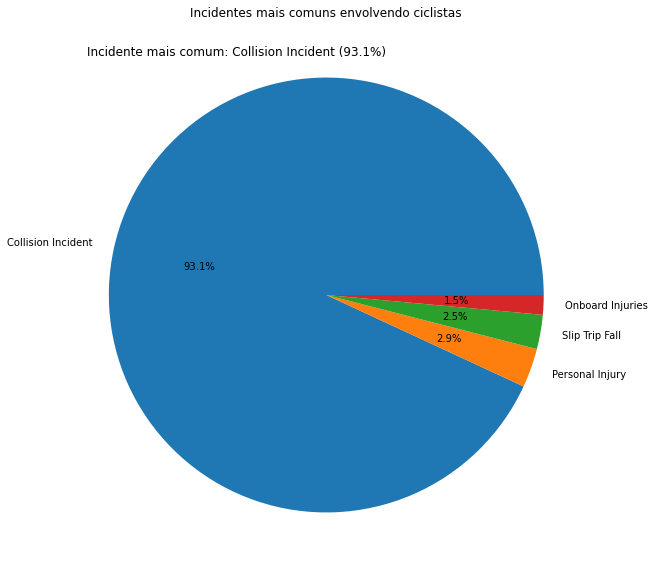

In [114]:
# Consulta SQL para obter os incidentes mais comuns envolvendo ciclistas
query = '''
SELECT `Incident Event Type`, COUNT(*) as total_incidentes
FROM df
WHERE `Victim Category` = 'Cyclist'
GROUP BY `Incident Event Type`
ORDER BY total_incidentes DESC
'''

# Executando a consulta SQL com pandasql
result = ps.sqldf(query, locals())

# Obtendo o incidente mais comum e sua porcentagem
mais_comum = result.iloc[0]['Incident Event Type']
porcentagem = result.iloc[0]['total_incidentes'] / result['total_incidentes'].sum() * 100

# Plotando o gráfico de pizza
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(result['total_incidentes'], labels=result['Incident Event Type'], autopct='%1.1f%%')
ax.set_title('Incidentes mais comuns envolvendo ciclistas')

# Adicionando o texto com o incidente mais comum e sua porcentagem
plt.text(-1.1, 1.1, f"Incidente mais comum: {mais_comum} ({porcentagem:.1f}%)", fontsize=12)

# Exibindo o gráfico
plt.show()